In [1]:
import pandas as pd
import numpy as np
import plotly as py
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import grid_search_forecaster
from sklearn import svm
from sklearn.metrics import mean_squared_error


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
constructor = pd.read_csv("archive\constructure-world-championship.csv")

In [72]:
constructor.tail(50)

,Season,Constructor,Class
234,1961,Honda,125cc
235,1961,MV Agusta,350cc
236,1960,MV Agusta,MotoGP™
237,1960,MV Agusta,250cc
238,1960,MV Agusta,125cc
239,1960,MV Agusta,350cc
240,1959,MV Agusta,MotoGP™
241,1959,MV Agusta,250cc
242,1959,MV Agusta,125cc
243,1959,MV Agusta,350cc


In [7]:
constructor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Season       284 non-null    int64 
 1   Constructor  284 non-null    object
 2   Class        284 non-null    object
dtypes: int64(1), object(2)
memory usage: 6.8+ KB


In [39]:
constructor["Constructor"].describe()


count       284
unique       36
top       Honda
freq         65
Name: Constructor, dtype: object

In [40]:
constructor["Class"].unique()

array(['MotoGP™', 'Moto2™', 'Moto3™', 'MotoE™', '125cc', '250cc', '80cc',
       '50cc', '350cc'], dtype=object)

In [3]:
MotoGPY = constructor[constructor["Class"]== "MotoGP™"]
MotoGP = MotoGPY["Constructor"].value_counts().reset_index()
MotoGP.columns = ["Casa" , "Victorias"]
MotoGP

,Casa,Victorias
0,Honda,23
1,Yamaha,18
2,MV Agusta,16
3,Suzuki,7
4,Gilera,6
5,Ducati,1
6,Norton,1
7,AJS,1


In [4]:
MotoGPY

,Season,Constructor,Class
0,2021,Yamaha,MotoGP™
4,2020,Suzuki,MotoGP™
8,2019,Honda,MotoGP™
12,2018,Honda,MotoGP™
15,2017,Honda,MotoGP™
...,...,...,...
264,1953,Gilera,MotoGP™
268,1952,Gilera,MotoGP™
272,1951,Norton,MotoGP™
276,1950,Gilera,MotoGP™


In [60]:
Moto2 = constructor[constructor["Class"] == 'Moto2™']
Moto2 = Moto2["Constructor"].value_counts().reset_index()
Moto2.columns = ["Casa" , "Victorias"]


In [63]:
Moto3 = constructor[constructor["Class"] == 'Moto3™']
Moto3 = Moto3["Constructor"].value_counts().reset_index()
Moto3.columns = ["Casa" , "Victorias"]

In [64]:
MotoE = constructor[constructor["Class"] == 'MotoE™']
MotoE = MotoE["Constructor"].value_counts().reset_index()
MotoE.columns = ["Casa" , "Victorias"]

(0.0, 3.0)

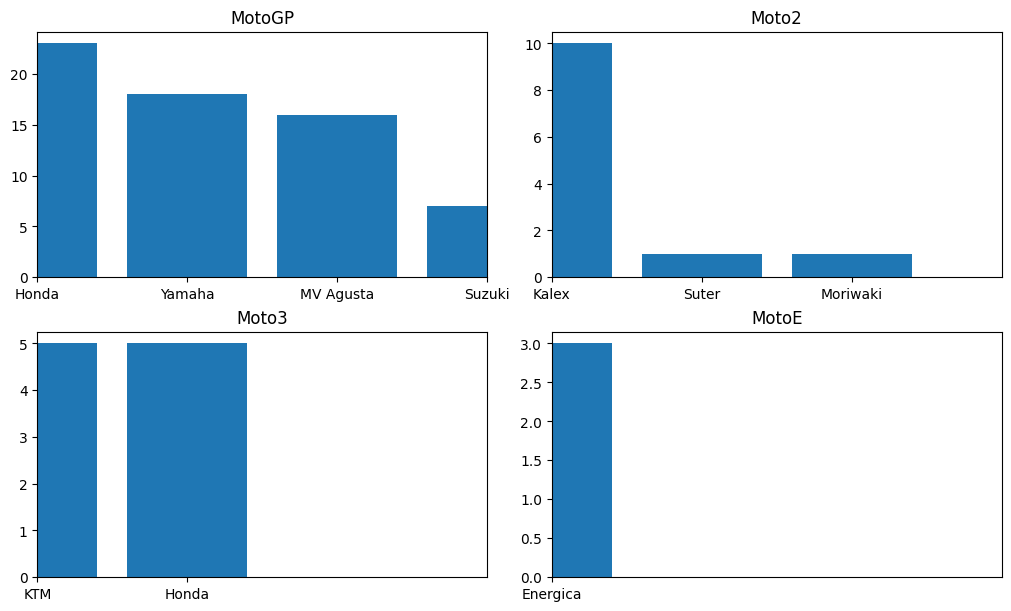

In [67]:
fig , ax = plt.subplots(nrows=2 , ncols=2 , figsize=(10,6), layout="constrained")
ax[0,0].bar(MotoGP["Casa"] , MotoGP["Victorias"])
ax[0,0].set_title("MotoGP")
ax[0,0].set_xlim(0,3)

ax[0,1].bar(Moto2["Casa"] , Moto2["Victorias"])
ax[0,1].set_title("Moto2")
ax[0,1].set_xlim(0,3)

ax[1,0].bar(Moto3["Casa"] , Moto3["Victorias"])
ax[1,0].set_title("Moto3")
ax[1,0].set_xlim(0,3)

ax[1,1].bar(MotoE["Casa"] , MotoE["Victorias"])
ax[1,1].set_title("MotoE")
ax[1,1].set_xlim(0,3)



Se tienen pocos datos de las categorias Moto2 , Moto3 y MotoE ya que estas son relativamente nuevas y antes, ademas del motoGP, se categorizaban por cilindraje (125,250,350,etc)

In [9]:
MotoGPH = MotoGPY[MotoGPY["Constructor"]=="Honda"]
MotoGPH

,Season,Constructor,Class
8,2019,Honda,MotoGP™
12,2018,Honda,MotoGP™
15,2017,Honda,MotoGP™
18,2016,Honda,MotoGP™
24,2014,Honda,MotoGP™
27,2013,Honda,MotoGP™
33,2011,Honda,MotoGP™
48,2006,Honda,MotoGP™
57,2003,Honda,MotoGP™
60,2002,Honda,MotoGP™


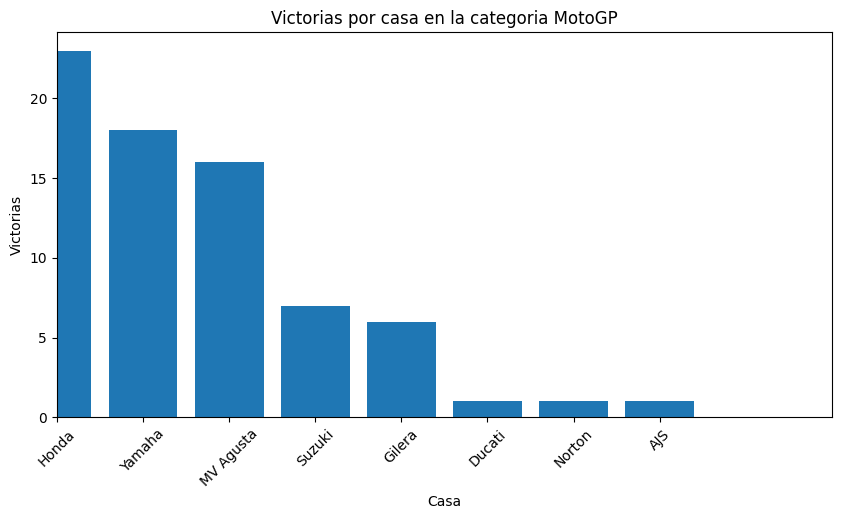

In [32]:
plt.figure(figsize=(10,5))
plt.bar(victorias["Casa"] , victorias["Victorias"])
plt.xlim(0,9)
plt.xlabel("Casa")
plt.ylabel("Victorias")
plt.title(f"Victorias por casa en la categoria MotoGP" )
plt.xticks(rotation=45)
plt.show()


In [4]:
MotoGPY["Season"] = pd.to_datetime(MotoGPY["Season"], format="%Y")


C:\Users\Usuario\AppData\Local\Temp\ipykernel_13520\2725331297.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MotoGPY["Season"] = pd.to_datetime(MotoGPY["Season"], format="%Y")


In [51]:
MotoGPY = MotoGPY.reset_index(drop=True)
MotoGPY.index = MotoGPY["Season"]

In [52]:
MotoGPY.drop("Season" , axis=1 , inplace=True)

In [5]:
MotoGPY.head(10)

,Season,Constructor,Class
0,2021-01-01,Yamaha,MotoGP™
4,2020-01-01,Suzuki,MotoGP™
8,2019-01-01,Honda,MotoGP™
12,2018-01-01,Honda,MotoGP™
15,2017-01-01,Honda,MotoGP™
18,2016-01-01,Honda,MotoGP™
21,2015-01-01,Yamaha,MotoGP™
24,2014-01-01,Honda,MotoGP™
27,2013-01-01,Honda,MotoGP™
30,2012-01-01,Yamaha,MotoGP™


Se debe convertir los strings en números para que el algoritmo pueda interpretarlo


In [6]:
MotoGPY["Constructor"].unique()

array(['Yamaha', 'Suzuki', 'Honda', 'Ducati', 'MV Agusta', 'Gilera',
       'Norton', 'AJS'], dtype=object)

In [7]:
numcasa = {"Yamaha":1 , "Suzuki":2 , "Honda":3 , "Ducati":4 , "MV Agusta":5 , 
            "Gilera":6 , "Norton":7 , "AJS":8}

In [8]:
MotoGPY["Constructor"] = MotoGPY["Constructor"].replace(numcasa)
MotoGPY

C:\Users\Usuario\AppData\Local\Temp\ipykernel_13520\1302874317.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MotoGPY["Constructor"] = MotoGPY["Constructor"].replace(numcasa)


,Season,Constructor,Class
0,2021-01-01,1,MotoGP™
4,2020-01-01,2,MotoGP™
8,2019-01-01,3,MotoGP™
12,2018-01-01,3,MotoGP™
15,2017-01-01,3,MotoGP™
...,...,...,...
264,1953-01-01,6,MotoGP™
268,1952-01-01,6,MotoGP™
272,1951-01-01,7,MotoGP™
276,1950-01-01,6,MotoGP™


In [9]:
casa = {"Casa":['Yamaha', 'Suzuki', 'Honda', 'Ducati', 'MV Agusta', 'Gilera',
       'Norton', 'AJS'], "Numero":[1,2,3,4,5,6,7,8]}

numerocasa = pd.DataFrame(casa)
numerocasa

,Casa,Numero
0,Yamaha,1
1,Suzuki,2
2,Honda,3
3,Ducati,4
4,MV Agusta,5
5,Gilera,6
6,Norton,7
7,AJS,8


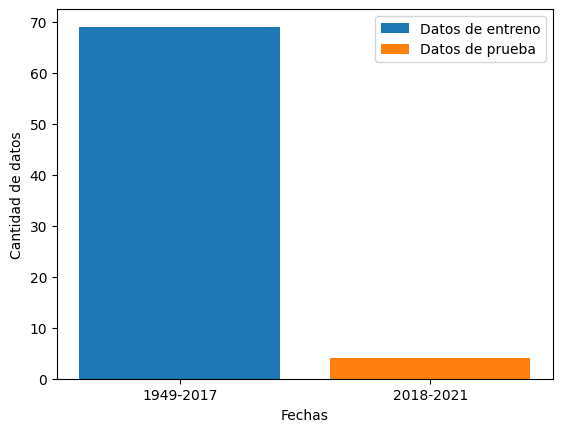

In [9]:

datos_train = MotoGPY[4:]
datos_test = MotoGPY[:4]

fig , ax = plt.subplots()
bar1 = ax.bar("1949-2017",len(datos_train),  label="Datos de entreno")
bar2 = ax.bar("2018-2021",len(datos_test), label="Datos de prueba")

ax.set_xlabel("Fechas")
ax.set_ylabel("Cantidad de datos")
ax.legend()

plt.show()

In [10]:
forecaster = ForecasterAutoreg(regressor=RandomForestRegressor(random_state=123), lags=1)

forecaster.fit(y=datos_train["Constructor"])

C:\Users\Usuario\AppData\Roaming\Python\Python311\site-packages\skforecast\utils\utils.py:798: UserWarning: `y` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\Usuario\AppData\Roaming\Python\Python311\site-packages\skforecast\utils\utils.py:798: UserWarning: `y` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(


In [11]:
prediccion = forecaster.predict(steps=4)
prediccion

C:\Users\Usuario\AppData\Roaming\Python\Python311\site-packages\skforecast\utils\utils.py:860: UserWarning: `last_window` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(


1    6.135119
2    6.270592
3    6.270592
4    6.270592
Name: pred, dtype: float64

In [14]:
datos_train = datos_train.reset_index()


In [15]:
datos_train.drop("index",axis=1)

,Season,Constructor,Class
0,2017-01-01,3,MotoGP™
1,2016-01-01,3,MotoGP™
2,2015-01-01,1,MotoGP™
3,2014-01-01,3,MotoGP™
4,2013-01-01,3,MotoGP™
...,...,...,...
64,1953-01-01,6,MotoGP™
65,1952-01-01,6,MotoGP™
66,1951-01-01,7,MotoGP™
67,1950-01-01,6,MotoGP™


In [16]:
steps = 30
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 10
             )

# Lags utilizados como predictores
lags_grid = [10, 20]

# Hiperparámetros del regresor
param_grid = {'n_estimators': [100, 500],
              'max_depth': [3, 5, 10]}

resultados_grid = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = datos_train["Constructor"],
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = steps,
                        refit              = False,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(datos_train)*0.5),
                        fixed_train_size   = False,
                        return_best        = True,
                        n_jobs             = 'auto',
                        verbose            = False)

Number of models compared: 12.


lags grid: 100%|██████████| 2/2 [00:11<00:00,  5.65s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10] 
  Parameters: {'max_depth': 3, 'n_estimators': 500}
  Backtesting metric: 8.82447951871025



Este bloque de codigo nos brinda los mejores parametros para el modelo de forecaster

In [17]:
resultados_grid

,lags,params,mean_squared_error,max_depth,n_estimators
1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 3, 'n_estimators': 500}",8.824480,3,500
0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 3, 'n_estimators': 100}",9.021072,3,100
5,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 10, 'n_estimators': 500}",9.210214,10,500
3,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 5, 'n_estimators': 500}",9.212829,5,500
4,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 10, 'n_estimators': 100}",9.299857,10,100
6,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 3, 'n_estimators': 100}",9.312451,3,100
8,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 5, 'n_estimators': 100}",9.321511,5,100
10,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 10, 'n_estimators': 100}",9.321511,10,100
2,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 5, 'n_estimators': 100}",9.327755,5,100
7,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 3, 'n_estimators': 500}",9.360193,3,500


A continuacion probamos un modelo mas simple a ver que nos arroja

In [6]:
MotoGPY = MotoGPY.drop("Class",axis=1)

In [12]:
x_train = MotoGPY.sample(frac=0.8, random_state=1)
x_test = MotoGPY.drop(x_train.index)

y_train = x_train.pop("Constructor")
y_test = x_test.pop("Constructor")


clf = svm.SVR()
clf.fit(x_train,y_train)

SVR()

In [14]:
predic = clf.predict(x_test)
predic

array([2.89303085, 2.9404464 , 2.95962959, 3.02408722, 3.06383987,
       3.07976142, 3.09370886, 3.05899136, 2.99075747, 2.68114222,
       1.96501829, 3.43999073, 5.49481072, 5.68744505, 5.87700707])

In [21]:
error = np.sqrt(mean_squared_error(y_test,predic))
print("Error porcentual : %f "% (error*100))

Error porcentual : 141.483425 


Tenemos errores muy grandes porque no tenemos suficientes datos para predecir algo tan complejo como lo son los ganadores de una competencia.

Esto se hizo por fines didacticos sobre las series tiempo